# Demo of optimal transport on gray rectangles 

In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
from pulp import *
import numpy as np
from math import sqrt

In [15]:
costs1 = [[1, sqrt(2), 2], [sqrt(2), 1, sqrt(5)]]
m_start1 = [3, 1]
m_arrival1 = [1, 1, 2]

def optimal_solve(costs, m_start, m_arrival):
  # Initialise les variables du problème
  problem = LpProblem("Optimal_transport", LpMinimize)
  paths = [(i, j) for i in range(len(m_start)) for j in range(len(m_arrival))]
  path_variables = LpVariable.dicts("Path", (range(len(m_start)), range(len(m_arrival))),
                                lowBound=0, cat='Continuous')

  # Définit la fonction objective
  problem += lpSum([path_variables[i][j] * costs[i][j] for (i, j) in paths])

  # Pose les contraintes
  for i in range(len(m_start)):
      problem += lpSum([path_variables[i][j] for j in range(len(m_arrival))]) == m_start[i]
  #print(problem)
  for j in range(len(m_arrival)):
      problem += lpSum([path_variables[i][j] for i in range(len(m_start))]) == m_arrival[j]

  problem.solve()

  result = {}
  for v in problem.variables():
      route = v.name.split("_")[1:]
      i, j = int(route[0]), int(route[1])
      result[i, j] = v.varValue

  optimal_plane = np.zeros((len(m_start), len(m_arrival)))
  for i, j in result.keys():
    optimal_plane[i,j] = result[i, j]

  #print(f"Plan de transport optimal :\n{optimal_plane}")  
  #print(problem.objective)
  #print(f"Coût minimal: {value(problem.objective)}")
  return optimal_plane

optimal_solve(costs1, m_start1, m_arrival1)

Welcome to the CBC MILP Solver 
Version: 2.10.5 
Build Date: Dec  8 2020 

command line - cbc /tmp/2515e9f8df9a4c668bdf451937a47ccc-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/2515e9f8df9a4c668bdf451937a47ccc-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 10 COLUMNS
At line 29 RHS
At line 35 BOUNDS
At line 36 ENDATA
Problem MODEL has 5 rows, 6 columns and 12 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 2 (-3) rows, 3 (-3) columns and 6 (-6) elements
0  Obj 6.6738883 Primal inf 4.1999981 (2) Dual inf 0.65027954 (2)
Optimal - objective value 6
After Postsolve, objective 6, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 6 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



array([[1., 0., 2.],
       [0., 1., 0.]])

In [16]:
costs2 = [[1, 1, 2, 1], [1, 1, 1, 2]]
m_start2 = [2, 2]
m_arrival2 = [1, 1, 1 , 1]
optimal_solve(costs2, m_start2, m_arrival2)

Welcome to the CBC MILP Solver 
Version: 2.10.5 
Build Date: Dec  8 2020 

command line - cbc /tmp/b1bed4e6cb924c9da303ceaa35eb4216-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/b1bed4e6cb924c9da303ceaa35eb4216-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 11 COLUMNS
At line 36 RHS
At line 43 BOUNDS
At line 44 ENDATA
Problem MODEL has 6 rows, 8 columns and 16 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 0 (-6) rows, 0 (-8) columns and 0 (-16) elements
Empty problem - 0 rows, 0 columns and 0 elements
Optimal - objective value 4
After Postsolve, objective 4, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 4 - 0 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wallclock seconds):       0.00



array([[1., 0., 0., 1.],
       [0., 1., 1., 0.]])

In [17]:
def valid_path(optimal_plane):
  list_indices_non_zero = np.argwhere(optimal_plane > 0).tolist()
  return list_indices_non_zero

In [18]:
def color_norm(color):
  return int(255-color*255)

In [19]:
def transport(list_indices_non_zero, start_indices, end_indices, optimal_plane, t_frac):

  image = 255 * np.ones((160,160), np.uint8)

  for coordinates in list_indices_non_zero:

    row_idx = coordinates[0]
    col_idx = coordinates[1]
    image[int(t_frac * start_indices[row_idx][0] + (1 - t_frac) * end_indices[col_idx][0])][int(t_frac * start_indices[row_idx][1] + (1 - t_frac) * end_indices[col_idx][1])] = color_norm(optimal_plane[row_idx][col_idx])

  return image

In [20]:
def rectangle(image, corner_coordinates, height, width, color):
  """
    Create a black rectangle for image
  """

  res_image = image.copy()

  x_start = corner_coordinates[0]
  y_start = corner_coordinates[1]

  for i in range(x_start, x_start+height):
      for j in range(y_start, y_start+width):
          res_image[i][j] = color_norm(color)

  return res_image

In [21]:
def get_indices_of_zeros(image):
  res = np.argwhere(image != 255).tolist()
  return res

In [22]:
def get_cost_matrix(start_indices, end_indices):

  res = np.zeros((len(start_indices), len(end_indices)))

  for row_idx in range(len(start_indices)):
      for col_idx in range(len(end_indices)):

          res[row_idx, col_idx] = math.dist(start_indices[row_idx], end_indices[col_idx])

  return res

## Test

Welcome to the CBC MILP Solver 
Version: 2.10.5 
Build Date: Dec  8 2020 

command line - cbc /tmp/9c5411a81ad241e6af56d1f9ec1eba04-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/9c5411a81ad241e6af56d1f9ec1eba04-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 197 COLUMNS
At line 24774 RHS
At line 24967 BOUNDS
At line 24968 ENDATA
Problem MODEL has 192 rows, 8192 columns and 16384 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 192 (0) rows, 8192 (0) columns and 16384 (0) elements
Perturbing problem by 0.001% of 136.35982 - largest nonzero change 0.00073508334 ( 0.00056579385%) - largest zero change 0
0  Obj 0 Primal inf 127.99998 (192)
53  Obj 1794.5554 Primal inf 131.39998 (174)
120  Obj 3131.8612 Primal inf 136.19998 (166)
181  Obj 3745.2672 Primal inf 144.19998 (164)
240  Obj 4356.5876 Primal inf 186.49998 (161)
305  Obj 4965.8771 Primal inf 172.39998 (154)
372  Obj 5453.7143 

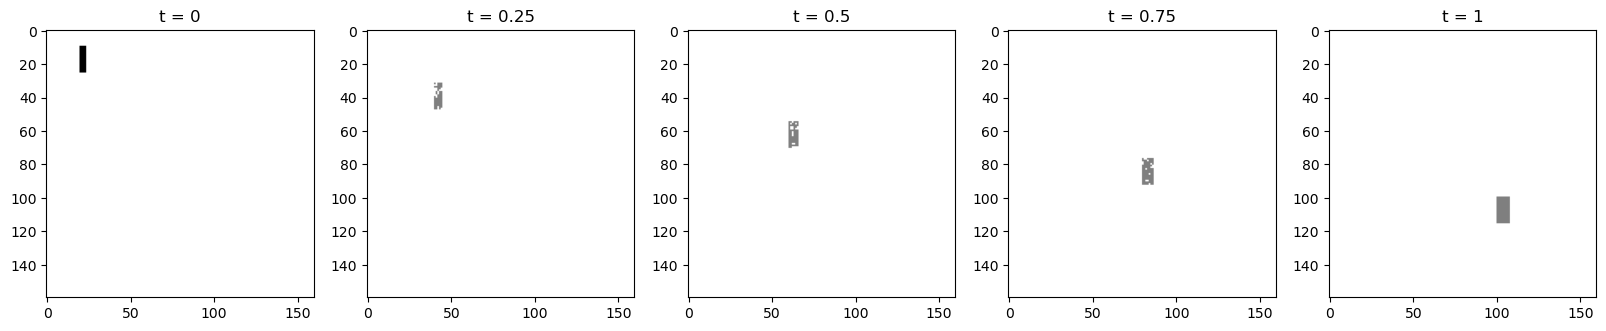

In [23]:
# Generate white backend
im1 = 255 * np.ones((160,160), dtype=np.uint8)
im2 = 255 * np.ones((160,160), dtype=np.uint8)

start_images = rectangle(im1, (10,20), 16, 4, 1)
end_images   = rectangle(im2, (100, 100), 16, 8, 0.5)

# Create figure
fig, ax = plt.subplots(1,5, figsize=(20, 20))
ax[0].imshow(start_images, cmap="gray", vmin=0, vmax=255)
ax[0].set_title("t = 0")

# Get start and end indices (indices of the rectangles)
start_indices = get_indices_of_zeros(start_images)
end_indices   = get_indices_of_zeros(end_images)

# Compute cost matrix
cost_matrix = get_cost_matrix(start_indices, end_indices)

# Solve the problem 
mass_start = [1 for i in range(len(start_indices))]
mass_end   = [0.5 for i in range(len(end_indices))]

optimal_plane = optimal_solve(cost_matrix, mass_start, mass_end)

# Compute the valid path
list_indices_non_zero = valid_path(optimal_plane)

list_t_frac = np.linspace(1/4, 3/4, 3)

i = 1

for t_frac in list_t_frac[::-1]:

  #print(list_indices_non_zero
  current_image = transport(list_indices_non_zero, start_indices, end_indices, optimal_plane, t_frac)

  ax[i].imshow(current_image, cmap="gray", vmin=0, vmax=255)
  ax[i].set_title(f"t = {1 - t_frac}")
  i += 1

ax[i].imshow(end_images, cmap="gray", vmin=0, vmax=255)
ax[i].set_title("t = 1")
plt.show()



# Demo of optimal transport on colored rectangles

In [24]:
def color_rectangle(image, corner_coordinates, height, width, color):
  """
    Create a black rectangle for image
  """

  res_image = image.copy()

  x_start = corner_coordinates[0]
  y_start = corner_coordinates[1]

  for i in range(x_start, x_start+height):
      for j in range(y_start, y_start+width):

          res_image[i][j][0] = color[0]
          res_image[i][j][1] = color[1]
          res_image[i][j][2] = color[2]

  return res_image

## Test 

Welcome to the CBC MILP Solver 
Version: 2.10.5 
Build Date: Dec  8 2020 

command line - cbc /tmp/9a27104baa5b478db2972d970d513b25-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/9a27104baa5b478db2972d970d513b25-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 581 COLUMNS
At line 221766 RHS
At line 222343 BOUNDS
At line 222344 ENDATA
Problem MODEL has 576 rows, 73728 columns and 147456 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 576 (0) rows, 73728 (0) columns and 147456 (0) elements
Perturbing problem by 0.001% of 136.37448 - largest nonzero change 0.00074783088 ( 0.000566032%) - largest zero change 0
0  Obj 0 Primal inf 61440 (576)
86  Obj 419241.32 Primal inf 62476.1 (555)
172  Obj 671773.84 Primal inf 63991.2 (543)
248  Obj 886815.26 Primal inf 61930.8 (533)
334  Obj 1062094 Primal inf 68719.2 (523)
420  Obj 1276379 Primal inf 84322.4 (511)
506  Obj 1354603.6 Primal inf 70

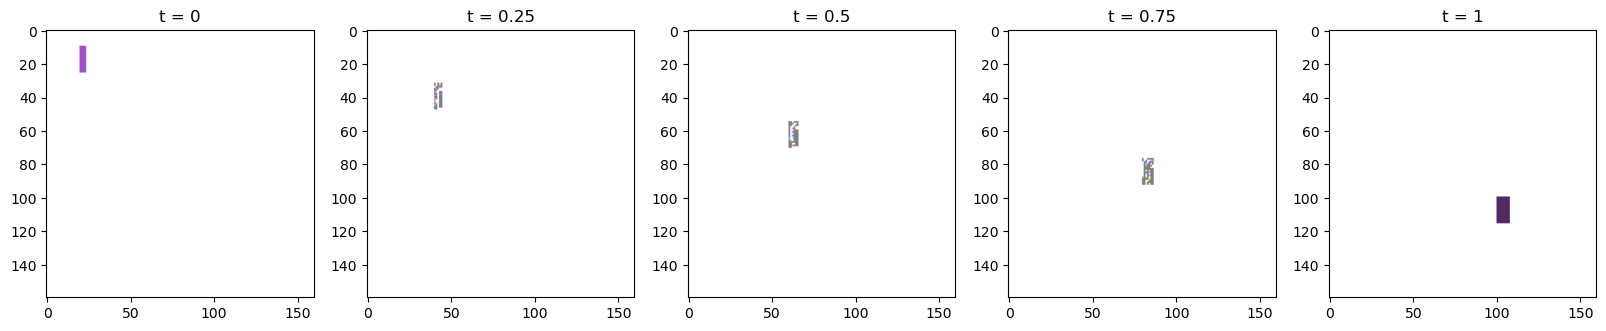

In [33]:
# Generate 
im1 = np.ones((160, 160, 3), dtype=np.uint8)
for i in range(3):
  im1[:,:,i] = 255 * im1[:,:,i]

im2 = np.ones((160, 160, 3), dtype=np.uint8)
for i in range(3):
  im2[:,:,i] = 255 * im2[:,:,i]

start_images = color_rectangle(im1, corner_coordinates=(10,20), height=16, width=4, color=[160,80,200])
end_images   = color_rectangle(im2, corner_coordinates=(100, 100), height=16, width=8, color=[80,40,100])

# Create figure
fig, ax = plt.subplots(1,5, figsize=(20, 20))
ax[0].imshow(start_images)
ax[0].set_title("t = 0")

# Get start and end indices (indices of the rectangles)
start_indices = get_indices_of_zeros(start_images)
end_indices   = get_indices_of_zeros(end_images)

# Compute cost matrix
cost_matrix = get_cost_matrix(start_indices, end_indices)

# Solve the problem 
mass_start0    = [160 for i in range(len(start_indices))]
mass_end0      = [80 for i in range(len(end_indices))]
optimal_plane0 = optimal_solve(cost_matrix, mass_start0, mass_end0)

mass_start1    = [80 for i in range(len(start_indices))]
mass_end1      = [40 for i in range(len(end_indices))]
optimal_plane1 = optimal_solve(cost_matrix, mass_start1, mass_end1)

mass_start2    = [200 for i in range(len(start_indices))]
mass_end2      = [100 for i in range(len(end_indices))]
optimal_plane2 = optimal_solve(cost_matrix, mass_start2, mass_end2)

# Compute the valid path
list_indices_non_zero0 = valid_path(optimal_plane0)
list_indices_non_zero1 = valid_path(optimal_plane1)
list_indices_non_zero2 = valid_path(optimal_plane2)

list_t_frac = np.linspace(1/4, 3/4, 3)

i = 1

for t_frac in list_t_frac[::-1]:

  #print(list_indices_non_zero
  current_image0 = transport(list_indices_non_zero0, start_indices, end_indices, optimal_plane, t_frac)
  current_image1 = transport(list_indices_non_zero1, start_indices, end_indices, optimal_plane, t_frac)
  current_image2 = transport(list_indices_non_zero2, start_indices, end_indices, optimal_plane, t_frac)
  #current_image = current_image.astype(np.uint8)

  displacement_image = np.zeros(shape=(current_image0.shape[0], current_image0.shape[1], 3), dtype=np.uint8)

  # Filling the channels
  displacement_image[:,:,0] = current_image0
  displacement_image[:,:,1] = current_image1
  displacement_image[:,:,2] = current_image2

  ax[i].imshow(displacement_image)
  ax[i].set_title(f"t = {1 - t_frac}")
  i += 1

ax[i].imshow(end_images)
ax[i].set_title("t = 1")
plt.show()
